# Exploratory data analysis (EDA) of apartments data

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py

# seaborn graphics settings
sns.set(color_codes=True)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Show current working directory
print(os.getcwd())

/Users/john/School/Sem5/DA/data_analytics/Week_04


## Univariate non-graphical exploratory data analysis (EDA)

### Importing the enriched apartment data

In [10]:
# Read and select variables
df_orig = pd.read_csv("apartments_data_enriched.csv")[['web-scraper-order',
                                                        'address_raw',
                                                        'lat',
                                                        'lon',
                                                        'bfs_number',
                                                        'bfs_name',
                                                        'rooms', 
                                                        'area', 
                                                        'luxurious', 
                                                        'price', 
                                                        'price_per_m2',
                                                        'pop',
                                                        'pop_dens',
                                                        'emp',
                                                        'frg_pct',
                                                        'mean_taxable_income']]

# Remove duplicates
df_orig = df_orig.drop_duplicates()
df_orig.head(5)

# Remove missing values
df_orig = df_orig.dropna()
df_orig.head(5)

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",47.252171,8.845797,118,Rüti (ZH),3.0,49.0,0,1441.0,29.41,12286,1221.272366,5053.0,24.841283,65362.042683
1,1693998233-172,"Widacherstrasse 5, 8630 Rüti ZH, ZH",47.252087,8.854919,118,Rüti (ZH),3.0,111.0,0,2600.0,23.42,12286,1221.272366,5053.0,24.841283,65362.042683
2,1693998256-331,"Widenweg 14, 8630 Rüti ZH, ZH",47.253670,8.853993,118,Rüti (ZH),3.0,58.0,0,1490.0,25.69,12286,1221.272366,5053.0,24.841283,65362.042683
3,1693998265-381,"Rain 1, 8630 Rüti ZH, ZH",47.259834,8.851705,118,Rüti (ZH),4.0,118.0,0,3240.0,27.46,12286,1221.272366,5053.0,24.841283,65362.042683
4,1693998276-419,"Bachtelstrasse 24b, 8630 Rüti ZH, ZH",47.266113,8.866872,118,Rüti (ZH),3.0,66.0,0,1450.0,21.97,12286,1221.272366,5053.0,24.841283,65362.042683


### Wihtout the outliers

In [60]:
# Definiere eine Liste von Werten, die als Outliers betrachtet werden sollen
outlier_rooms = [5.0, 6.0, 6.5, 7.0, 7.5, 8.5]

# Entferne Zeilen mit den angegebenen Zimmerwerten und extremen Preisen pro Quadratmeter
filtered_df = df_orig.loc[
    (~df_orig['rooms'].isin(outlier_rooms)) &  # Zimmerfilter
    (df_orig['price_per_m2'] > 10) &  # Filter für niedrige Kosten pro Quadratmeter
    (df_orig['price_per_m2'] < 100)  # Filter für moderate Kosten pro Quadratmeter
]

# Erstelle die Kreuztabelle für das gefilterte DataFrame
crosstab_filtered = pd.crosstab(filtered_df['luxurious'], filtered_df['rooms'])

print(crosstab_filtered)


rooms      1.0  1.5  2.0  2.5  3.0  3.5  4.0  4.5  5.5
luxurious                                             
0           49   33   38  135   44  200   28  163   52
1            0    0    0    6    0    3    0    0    0


### Quantiles original values

In [61]:
filtered_df[['price','rooms', 'area', 'price_per_m2', 'pop_dens']].quantile(q=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).round(2)

,price,rooms,area,price_per_m2,pop_dens
0.05,1345.0,1.0,26.0,18.82,355.76
0.10,1495.0,1.5,43.0,20.50,525.66
0.25,1837.5,2.5,63.0,23.43,1044.63
0.50,2370.0,3.5,85.0,27.95,1662.60
0.75,2980.0,4.5,105.0,38.14,4778.99
0.90,3870.0,4.5,135.0,51.74,4778.99
0.95,4800.0,5.5,148.0,64.05,4778.99


### Filter apartments

In [62]:
# Filter apartments (replace '<= 5000' by the respective operator and quantile)
df = filtered_df.loc[filtered_df['pop_dens'] <= 5000]

### Shape (number of rows and colums)

In [63]:
# Number of rows and columns
print(df.shape)

(751, 16)


### Data types

In [64]:
df.dtypes

web-scraper-order       object
address_raw             object
lat                    float64
lon                    float64
bfs_number               int64
bfs_name                object
rooms                  float64
area                   float64
luxurious                int64
price                  float64
price_per_m2           float64
pop                      int64
pop_dens               float64
emp                    float64
frg_pct                float64
mean_taxable_income    float64
dtype: object

### Summary statistics of numeric variables (without outliers)

In [91]:
df.describe()

,lat,lon,bfs_number,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income,var
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,7.510000e+02
mean,47.407714,8.600469,186.625832,3.330226,86.661784,0.011984,2603.053262,32.961545,159223.817577,2494.913396,174863.709720,27.877649,80494.145168,-1.892258e-17
std,0.085349,0.117915,81.020885,1.173089,36.914678,0.108886,1233.156871,14.813283,185689.773718,1736.599280,222650.090908,7.537759,14546.792930,1.000000e+00
min,47.195290,8.367652,1.000000,1.000000,8.000000,0.000000,86.000000,10.750000,698.000000,87.959866,129.000000,7.547170,62000.541872,-2.130908e+00
25%,47.361300,8.516450,121.000000,2.500000,63.000000,0.000000,1837.500000,23.430000,9345.000000,1044.628957,3591.000000,24.535004,70964.087938,-6.409858e-01
50%,47.397003,8.563809,230.000000,3.500000,85.000000,0.000000,2370.000000,27.950000,27746.000000,1662.597326,19226.000000,28.076256,80595.528256,-4.501690e-02
75%,47.481356,8.711268,261.000000,4.500000,105.000000,0.000000,2980.000000,38.140000,420217.000000,4778.994655,491193.000000,32.458468,82932.737704,4.967730e-01
max,47.693893,8.915933,298.000000,5.500000,282.000000,1.000000,9950.000000,97.730000,420217.000000,4778.994655,491193.000000,46.226483,174434.537050,5.291614e+00


### Statistical measures (min, max, std, mean, median, count) for selected variables

In [66]:
# Price
print('Price:',
      'Count:', round(df.price.count(), 1),
      'Min:', round(df.price.min(), 1),
      'Max:', round(df.price.max(), 1),
      'Mean:', round(df.price.mean(), 1),
      'Median:', round(df.price.median(), 1),
      'Std:', round(df.price.std(), 1))

# Area
print('Area:',
      'Count:', round(df.area.count(), 1),
      'Min:', round(df.area.min(), 1),
      'Max:', round(df.area.max(), 1),
      'Mean:', round(df.area.mean(), 1),
      'Median:', round(df.area.median(), 1),
      'Std:', round(df.area.std(), 1))

Price: Count: 751 Min: 86.0 Max: 9950.0 Mean: 2603.1 Median: 2370.0 Std: 1233.2
Area: Count: 751 Min: 8.0 Max: 282.0 Mean: 86.7 Median: 85.0 Std: 36.9


### Skewness

In [67]:
df[['price','rooms', 'area']].skew()

price    2.300176
rooms   -0.159440
area     0.788935
dtype: float64

### Kurtosis

In [68]:
df[['price','rooms', 'area']].kurtosis()

price    8.044344
rooms   -0.552792
area     2.110480
dtype: float64

### Extreme values

In [69]:
# Low costs apartments
df[df['price_per_m2'] <= 10]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


In [70]:
# Very expansive apartments
df[df['price_per_m2'] >= 100]

,web-scraper-order,address_raw,lat,lon,bfs_number,bfs_name,rooms,area,luxurious,price,price_per_m2,pop,pop_dens,emp,frg_pct,mean_taxable_income


### Get a list of categories of categorical variable

In [71]:
np.array(pd.Categorical(df['bfs_name']).categories)

array(['Adliswil', 'Aeugst am Albis', 'Affoltern am Albis', 'Altikon',
       'Andelfingen', 'Bachenbülach', 'Bassersdorf', 'Bauma',
       'Bonstetten', 'Brütten', 'Bülach', 'Dielsdorf', 'Dietikon',
       'Dietlikon', 'Dättlikon', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elsau', 'Embrach', 'Fehraltorf', 'Feuerthalen',
       'Freienstein-Teufen', 'Fällanden', 'Glattfelden', 'Gossau (ZH)',
       'Greifensee', 'Hausen am Albis', 'Hedingen', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hittnau', 'Hochfelden', 'Hombrechtikon',
       'Höri', 'Hüttikon', 'Kloten', 'Knonau', 'Küsnacht (ZH)',
       'Langnau am Albis', 'Laufen-Uhwiesen', 'Lindau', 'Lufingen',
       'Maur', 'Meilen', 'Mettmenstetten', 'Männedorf', 'Mönchaltorf',
       'Neerach', 'Neftenbach', 'Niederglatt', 'Niederhasli',
       'Niederweningen', 'Nürensdorf', 'Oberengstringen', 'Oberglatt',
       'Obfelden', 'Oetwil am See', 'Oetwil an der Limmat', 'Opfikon',
       'Ossingen', 'Pfungen', 'Pfäffikon', 'Regensd

## Multivariate non-graphical exploratory data analysis (EDA)

### Cross-tabulation

In [72]:
pd.crosstab(df['luxurious'], df['rooms'])

rooms,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.5
luxurious,,,,,,,,,
0,49,33,38,135,44,200,28,163,52
1,0,0,0,6,0,3,0,0,0


### Pivot tables

In [73]:
# Using pivot_table to reshape the data and calculate means 
pd.pivot_table(df[['rooms', 'price', 'price_per_m2', 'area', 'luxurious']],
               index=['rooms', 'luxurious'],
               values=['price', 'price_per_m2', 'area'],
               aggfunc=(np.mean, 'count'))

area             price              price_per_m2           
                count        mean count         mean        count       mean
rooms luxurious                                                             
1.0   0            49   33.285714    49  1302.265306           49  46.061633
1.5   0            33   35.969697    33  1963.515152           33  59.417576
2.0   0            38   55.184211    38  2120.078947           38  40.757105
2.5   0           135   66.800000   135  2382.755556          135  37.010000
      1             6   72.166667     6  3339.500000            6  45.978333
3.0   0            44   68.159091    44  1964.022727           44  28.677955
3.5   0           200   89.770000   200  2648.980000          200  29.494700
      1             3  101.666667     3  6036.666667            3  59.826667
4.0   0            28   98.464286    28  2852.357143           28  29.646429
4.5   0           163  114.926380   163  3086.570552          163  26.493436
5.5   0            52  153.250000    52  3590.653846           52  23.587500

### Correlation matrix

In [74]:
corr = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov().corr()
corr

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.000000,0.977334,0.398177,-0.553933,-0.677654,-0.753525
area,0.977334,1.000000,0.583310,-0.365162,-0.506616,-0.597278
price,0.398177,0.583310,1.000000,0.543149,0.404572,0.302807
price_per_m2,-0.553933,-0.365162,0.543149,1.000000,0.987441,0.964517
pop_dens,-0.677654,-0.506616,0.404572,0.987441,1.000000,0.994072
frg_pct,-0.753525,-0.597278,0.302807,0.964517,0.994072,1.000000


### Covariance matrix

In [75]:
cov = df[['rooms', 
          'area', 
          'price', 
          'price_per_m2',
          'pop_dens',
          'frg_pct']].cov()
cov

,rooms,area,price,price_per_m2,pop_dens,frg_pct
rooms,1.376138,35.401837,6.046397e+02,-8.534964,-6.986364e+02,-2.421972
area,35.401837,1362.693458,2.657623e+04,-253.781850,-1.798312e+04,-71.071257
price,604.639721,26576.232705,1.520676e+06,5813.018131,6.244471e+05,855.246668
price_per_m2,-8.534964,-253.781850,5.813018e+03,219.433366,1.601541e+04,38.479576
pop_dens,-698.636382,-17983.122788,6.244471e+05,16015.411866,3.015777e+06,8529.365101
frg_pct,-2.421972,-71.071257,8.552467e+02,38.479576,8.529365e+03,56.817807


## Univariate graphical exploratory data analysis (EDA)

### Line chart (matplotlib)

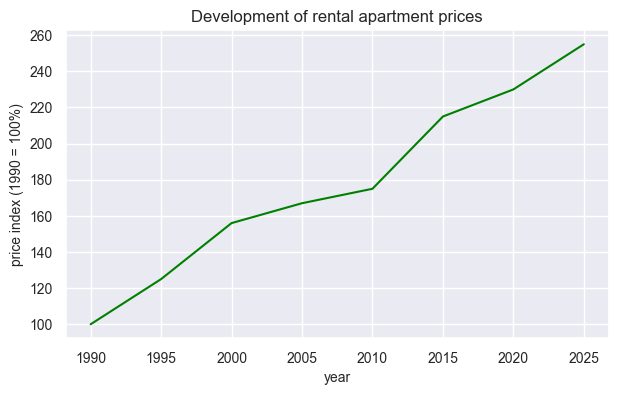

In [76]:
# Generate some useful values (time series)
x = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
y = [100, 125, 156, 167, 175, 215, 230, 255]

# Create figure
fig = plt.figure(figsize=(7,4))
plt.plot(x, y, color="green")
plt.title('Development of rental apartment prices', fontsize=12)
plt.xlabel('year', fontsize=10)
plt.ylabel('price index (1990 = 100%)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Boxplot (seaborn)

<Axes: xlabel='area'>

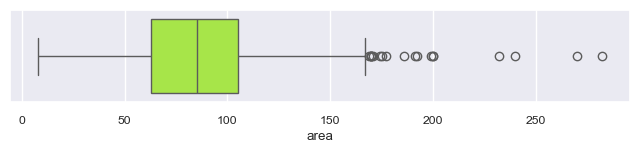

In [77]:
plt.figure(figsize=(8,1.2))
plt.ticklabel_format(style='plain')
sns.boxplot(x=df['area'], color="greenyellow")

### Histogram  (matplotlib)

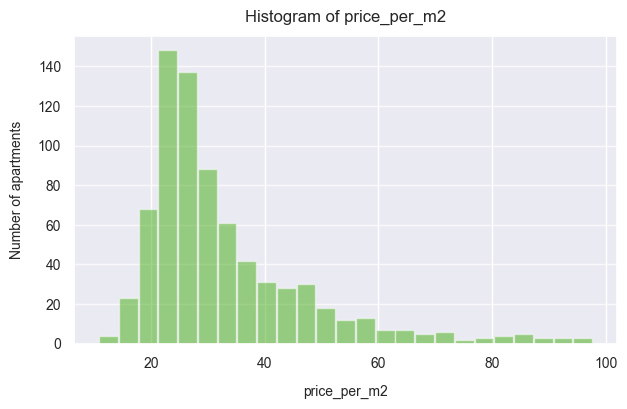

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Histogram
fig = plt.figure( figsize=(7,4))

plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)

n, bins, patches = plt.hist(x=df['price_per_m2'], 
                            bins=25, 
                            color='#42AD12',
                            alpha=0.5, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('price_per_m2', fontsize=10, labelpad=10)
plt.ylabel('Number of apartments', fontsize=10, labelpad=10)
plt.title('Histogram of price_per_m2', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Density plot  (seaborn)

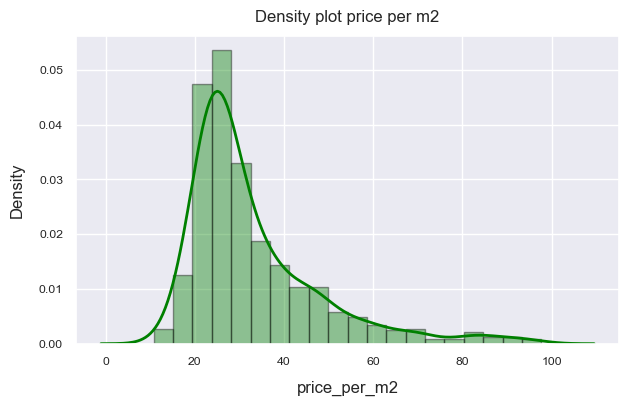

In [79]:
plt.figure(figsize=(7,4))
sns.distplot(df['price_per_m2'], 
             hist=True, 
             kde=True, 
             bins=20, 
             color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2},
            )
plt.title('Density plot price per m2', fontsize=12, pad=10)
plt.xlabel('price_per_m2', fontsize=12, labelpad=10)
plt.ylabel('Density', fontsize=12, labelpad=10)
plt.grid(True)
plt.show()

### Quantile-Quantile (QQ-) plot

      area       var
682    8.0 -2.130908
190   14.0 -1.968371
52    15.0 -1.941282
431   15.0 -1.941282
217   16.0 -1.914192
..     ...       ...
777  200.0  3.070275
401  232.0  3.937139
291  240.0  4.153855
686  270.0  4.966540
445  282.0  5.291614

[751 rows x 2 columns]


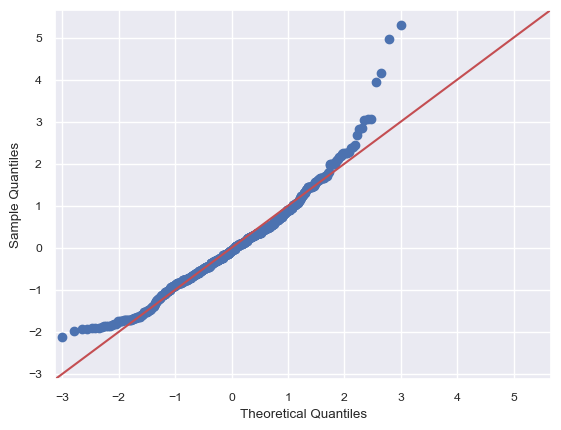

In [80]:
# Variable (standardized)
x = 'area'
df_qq = df
df_qq['var'] = (df[x]-df[x].mean()) / df[x].std()
print(df_qq.sort_values('var')[['area', 'var']])
    
# Plot
sm.qqplot(df_qq['var'], line ='45')
py.show()

### Barchart  (matplotlib)

In [81]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
index

[4.0, 1.5, 2.0, 3.0, 1.0, 5.5, 2.5, 4.5, 3.5]

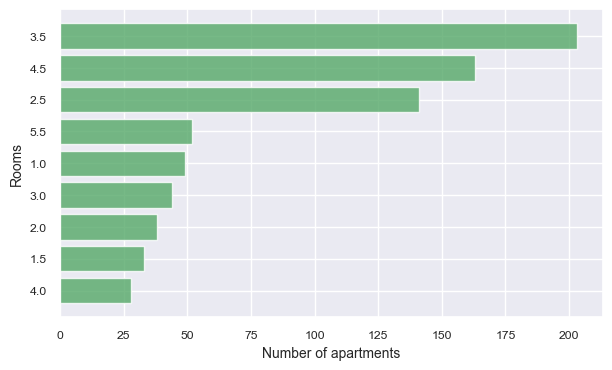

In [82]:
# Group data by rooms (only the topmost 15 values are shown)
df_bar = df['rooms'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
napart = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,4))
ax.barh(y_pos, napart, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of apartments', fontsize=10)
ax.set_ylabel('Rooms', fontsize=10)

# Show graph
plt.show()

### Piechart (matplotlib)

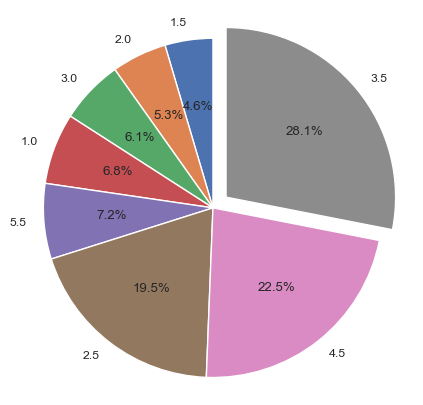

In [83]:
# Group data by rooms (only the 8 most frequently occurencies by rooms)
df_bar = df.rooms.value_counts().nlargest(8).sort_values(ascending=True)

# Simple bar chart
sizes = list(df_bar.values)
labels = list(df_bar.index.values)
explode = (0, 0, 0, 0, 0.0, 0, 0, 0.1) # increases distance of pieces

fig1, ax1 = plt.subplots(figsize=(5,5))
ax1.pie(sizes, 
        labels=labels, 
        explode=explode,
        autopct='%1.1f%%',
        shadow=False, 
        startangle=90)
ax1.axis('equal')  # ensures that pie is drawn as a circle.

plt.show()

## Multivariate graphical exploratory data analysis (EDA)

### Scatterplot (matplotlib)

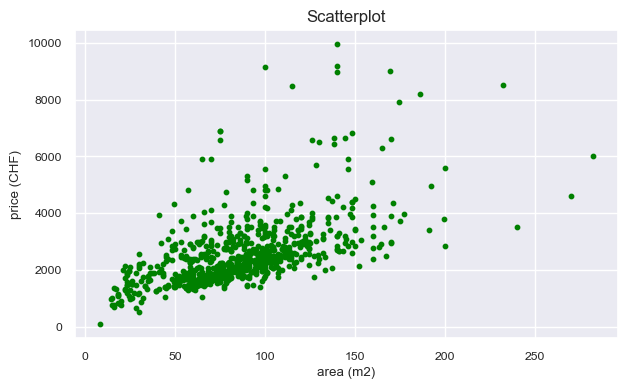

In [84]:
plt.figure(figsize=(7,4))
plt.scatter(df['area'], 
           df['price'], 
           color="green", 
           alpha=1.0,
           s=10)
plt.title('Scatterplot', fontsize=12)
plt.xlabel('area (m2)')
plt.ylabel('price (CHF)')
plt.show()

### Scatterplot (matplotlib) with regression line

(737, 17)
18.96436745605597
970.6231667678743


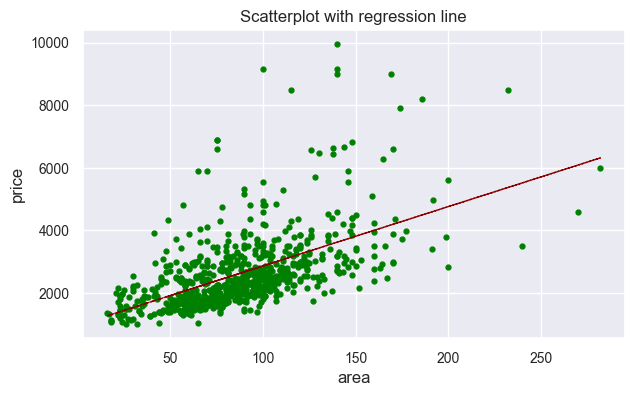

In [85]:
# Subset
df_sub = df.loc[(df.price >= 1000)]
print(df_sub.shape)

# Scatterplot
plt.figure(figsize=(7,4))
plt.plot(df_sub.area, 
         df_sub.price, 
         'o', 
         markersize=3.5,
         color="green")

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df_sub.area, df_sub.price, 1)
print(b)
print(a)

# Plot regression line
plt.plot(df_sub.area, 
         b*df_sub.area + a, 
         linewidth=1,
         linestyle='dashed',
         color='darkred')

# Add title and axes labels
plt.title('Scatterplot with regression line', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.xlabel('area', fontsize=12)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Scatterplot-matrix (seaborn)

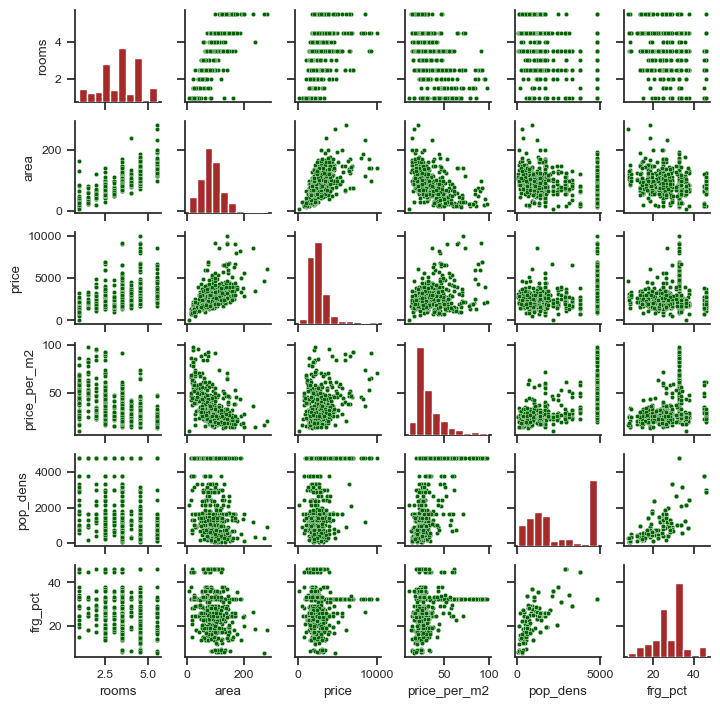

In [86]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Hexagonal binning plot  (matplotlib)

(728, 17)


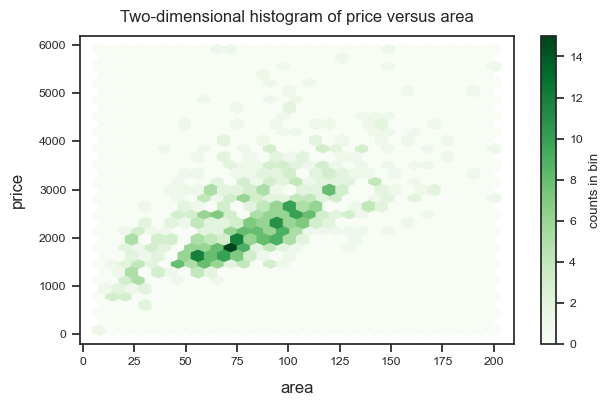

In [87]:
# Subset
df_sub = df.loc[(df.price <= 6000) & (df.area <= 200)]
print(df_sub.shape)

# Plot
fig = plt.figure( figsize=(7,4) )
plt.hexbin(df_sub.area, df_sub.price, gridsize=30, cmap='Greens')

# Set labels
plt.xlabel('area', fontsize=12, labelpad=10)
plt.ylabel('price', fontsize=12, labelpad=10)
plt.title('Two-dimensional histogram of price versus area', fontsize=12, pad=10)

cb = plt.colorbar(label='count in bin')
cb.set_label('counts in bin')

### Correlation heatmap (seaborn)

<Axes: >

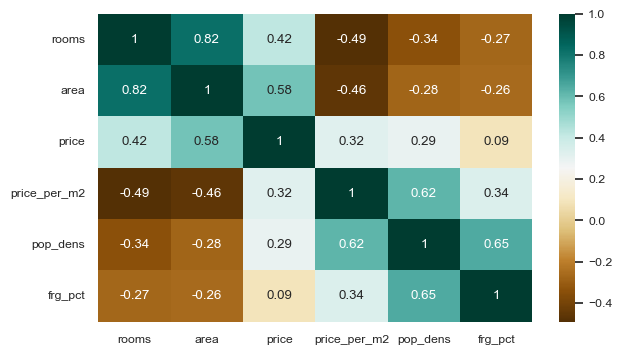

In [88]:
# Set font size for plot
sns.set(font_scale=0.8)

# Create correlation matrix as the basis for the heatmap
plt.figure(figsize=(7,4))
corr = df[['rooms', 
                     'area', 
                     'price', 
                     'price_per_m2',
                     'pop_dens',
                     'frg_pct']].corr().round(2)

# Plot heatmap
sns.heatmap(corr, 
            cmap="BrBG", 
            annot=True)

### Bubble plot (seaborn)

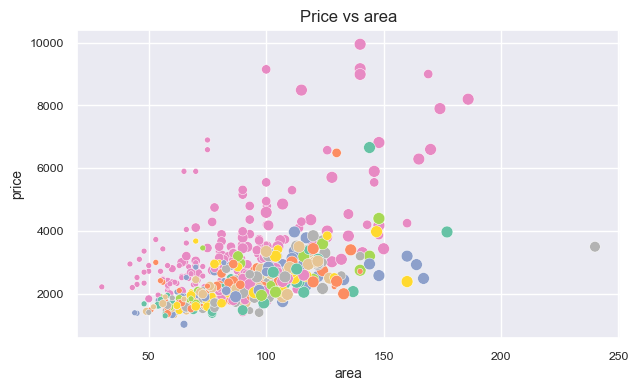

In [89]:
# Subset of df
df_sub = df.loc[(df['rooms'] >= 2.5) & (df['rooms'] <= 4.5)]

plt.figure(figsize=(7,4))
plt.ticklabel_format(style='plain')
cmap = sns.cubehelix_palette(dark=.3, light=3, as_cmap=True)

ax = sns.scatterplot(x="area", 
                     y="price",
                     size="rooms", # determines bubble size
                     hue="pop_dens",  # determines color
                     palette="Set2",
                     data=df_sub)

# Set title and axes
ax.set_title('Price vs area', fontsize = 12)
ax.set_xlabel('area', fontsize = 10)
ax.set_ylabel('price', fontsize = 10)
ax.legend([],[], frameon=False) # skip legend

### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [90]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.0.0
Datetime: 2023-10-13 19:11:12
Python Version: 3.9.6
-----------------------------------
